# Lab 2
#### Simon Jasansky


## Assignment 1.1

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import data
exp1 = list()
exp1.append(pd.read_csv("data/exp1a.csv"))
exp1.append(pd.read_csv("data/exp1b.csv"))
exp1.append(pd.read_csv("data/exp1c.csv"))

exp2 = list()
exp2.append(pd.read_csv("data/exp2a.csv"))
exp2.append(pd.read_csv("data/exp2b.csv"))

exp3 = list()
exp3.append(pd.read_csv("data/exp3a.csv"))
exp3.append(pd.read_csv("data/exp3b.csv"))
exp3.append(pd.read_csv("data/exp3c.csv"))
exp3.append(pd.read_csv("data/exp3d.csv"))

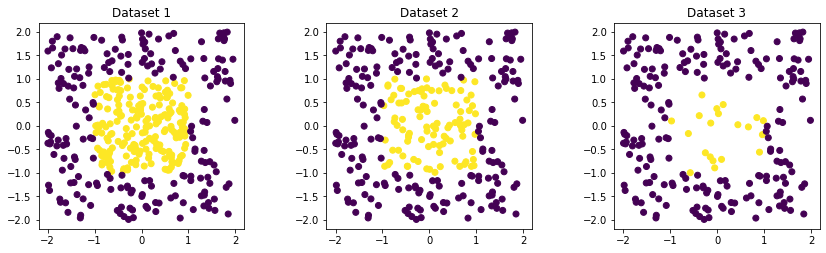

In [22]:
# (a) plot the data
fig = plt.figure(figsize= (14,14))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i in range(0, len(exp1)):
    ax = fig.add_subplot(1, 3, i+1)
    ax.scatter(exp1[i]["x"], exp1[i]["y"],
               c = exp1[i]["class"])
    ax.set_title("Dataset " + str(i+1))
    ax.set(adjustable="box", aspect="equal")


In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import copy

# custom function for knn with 10-fold Cross-Validation
def custom_knn(datasets, weights = "uniform", metric = "euclidean"):
    accuracy_l = list()
    conf_mat_l = list()

    for i in range(0, len(datasets)):
        X_names = [x for x in datasets[i].columns if x != "class"]
        X = np.array(datasets[i][X_names])
        Y = np.array(datasets[i]["class"])

        accuracy_temp = list()
        conf_mat_temp = list()

        for k in [1,5,11,21]:
            classification_method = KNeighborsClassifier(n_neighbors = k, weights = weights,
                                                         metric = metric)
            Y_pred = cross_val_predict(classification_method, X, Y, cv = 10)
            conf_mat = confusion_matrix(Y, Y_pred)
            accuracy = accuracy_score(Y, Y_pred)
            accuracy_temp.append(accuracy)
            conf_mat_temp.append(conf_mat)
        accuracy_l.append(np.around(np.array(accuracy_temp), 3)) # round accuracy rates
        conf_mat_l.append(conf_mat_temp)

    #construct column names for accuracy and confusion matrix table
    ds_name = ["Dataset "] * len(datasets)
    ds_nr = range(1,(len(datasets)+1))
    col_names = [ds + str(nr) for ds,nr in zip(ds_name, ds_nr)]

    # build accuracy table
    accuracy_df = pd.DataFrame(data = accuracy_l,
                               columns = ["k = 1", "k = 5", "k = 11", "k = 21"],
                               index = col_names)

    # build the confusion matrix table
    conf_mat_df = pd.DataFrame(data = conf_mat_l,
                               columns = ["k = 1", "k = 5", "k = 11", "k = 21"],
                               index = col_names)
    return(accuracy_df.transpose(), conf_mat_df.transpose())

In [24]:
import matplotlib.gridspec as gridspec

# custom function to plot the confusion matrix
def custom_confusion_matrix_knn(conf_df, x_dim, y_dim):
    fig = plt.figure(figsize=(7, 7))
    outer = gridspec.GridSpec(y_dim, x_dim, wspace=0.2, hspace=0.2)
    fig.suptitle("Confusion matrices", size = "20")

    x_outer = list()
    for x in range(y_dim):
        x_outer.append([x]*x_dim)
    x_outer = list(np.concatenate(x_outer).flat)
    y_outer = list(range(x_dim)) * y_dim

    x_inner = [0,0,1,1]
    y_inner = [0,1,0,1]

    #construct column names for accuracy and confusion matrix table
    ds_name = ["Dataset "] * x_dim
    ds_nr = range(1, x_dim + 1)
    sub_titles_x = [ds + str(nr) for ds,nr in zip(ds_name, ds_nr)]
    sub_titles_y = ["k = 1", "k = 5", "k = 11", "k = 21"]
    k_count = 0

    for i in range(x_dim * y_dim):
        inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                 subplot_spec=outer[i],
                                                 wspace=0, hspace=0)
        if i in list(range(0, x_dim)):
            ax1 = plt.Subplot(fig, outer[i])
            ax1.set_title(sub_titles_x[i], size = 12)
            ax1.set_xticks([])
            ax1.set_yticks([])
            fig.add_subplot(ax1)

        if i in list(range(0, 12, x_dim)):
            ax2 = plt.Subplot(fig, outer[i])
            ax2.text(-0.15, 0.4, sub_titles_y[k_count],
                     rotation = 90, size = 12)
            ax2.set_xticks([])
            ax2.set_yticks([])
            fig.add_subplot(ax2)
            k_count += 1

        for j in range(4):
            ax = plt.Subplot(fig, inner[j])
            t = ax.text(0.5,0.35,
                        conf_df.iat[x_outer[i], y_outer[i]][x_inner[j], y_inner[j]],
                        size = 15)
            t.set_ha('center')
            ax.set_xticks([])
            ax.set_yticks([])
            if x_inner[j] == 0 and y_inner[j] == 0:
                ax.text(0.05, 0.75, "TP:", size = 10)
            if x_inner[j] == 0 and y_inner[j] == 1:
                ax.text(0.05, 0.75, "FP:", size = 10)
            if x_inner[j] == 1 and y_inner[j] == 0:
                ax.text(0.05, 0.75, "FN:", size = 10)
            if x_inner[j] == 1 and y_inner[j] == 1:
                ax.text(0.05, 0.75, "TN:", size = 10)
            fig.add_subplot(ax)
    return(fig)

        Dataset 1  Dataset 2  Dataset 3
k = 1       0.978      0.960      0.941
k = 5       0.952      0.967      0.977
k = 11      0.942      0.947      0.945
k = 21      0.928      0.940      0.936


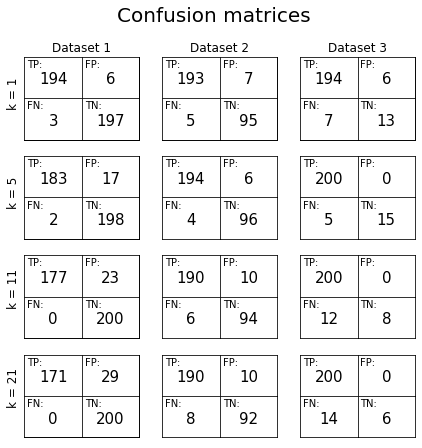

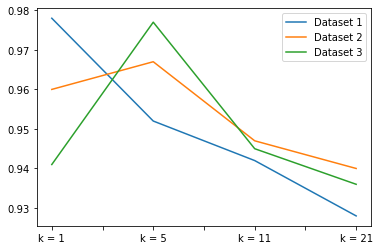

In [25]:
# (b)
output = custom_knn(exp1, "uniform")
accuracy_df_knn_uniform = output[0]
conf_mat_df_knn_uniform = output[1]

print(accuracy_df_knn_uniform)
custom_confusion_matrix_knn(conf_mat_df_knn_uniform, 3, 4)
plt.show()

accuracy_df_knn_uniform.plot()
plt.show()

(b) and (c):
For dataset 1, accuracy decreases with an increase in the number of $k$, and is highest at about 97.8% when $k=1$. For datasets 2 and 3 accuracy increases when k increases from 1 to 5, is highest for $k=5$, and decreases again for higher k.
The confusion matrices for dataset 1 show that the decrease in accuracy almost exclusively comes from False Positives, i.e. class -1 being classified as class 1. The reason is the higher density of class 1 compared to class -1, as each class has the same amount of instances, but class 1 is constrained to a smaller space, thus it has higher density. For an increasing k, this makes it more likely that for border points more points of class 1 than of class -1 are included in the KNN, thus misclassifying border points as class 1.
For dataset 2, the number of False Positives and False Negatives is close to each other, and both are lowest for $k=5$. Even though density of class 1 is still higher than for class 2 (same argument as for DS1), the effect of misclassifying border points as class 1 is less apparent due to the overall lower density.
For dataset 3, an increase in k leads to more points of class 1 being classified as -1, due to the heavy imbalance in the number of instances per class, and thus the much higher density of class -1 compared to lower density of class 1.

        Dataset 1  Dataset 2  Dataset 3
k = 1       0.978      0.960      0.941
k = 5       0.968      0.970      0.977
k = 11      0.962      0.960      0.968
k = 21      0.948      0.963      0.968
Difference dataframe:
        Dataset 1  Dataset 2  Dataset 3
k = 1       0.000      0.000      0.000
k = 5       0.016      0.003      0.000
k = 11      0.020      0.013      0.023
k = 21      0.020      0.023      0.032


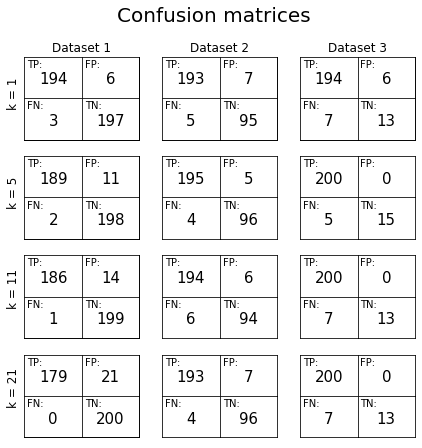

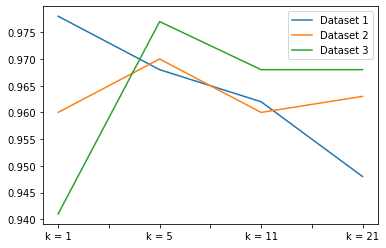

In [26]:
# knn with 10-fold Cross-Validation with weights = distance
output = custom_knn(exp1, "distance")
accuracy_df_knn_distance = output[0]
conf_mat_df_knn_distance = output[1]

print(accuracy_df_knn_distance)
print("Difference dataframe:")
print(accuracy_df_knn_distance - accuracy_df_knn_uniform)
custom_confusion_matrix_knn(conf_mat_df_knn_distance, 3, 4)
plt.show()

accuracy_df_knn_distance.plot()
plt.show()

(d):
Adding weights by distance improved accuracy rates for all datasets and k (see accuracy difference dataframe), or at least did not decrease them. The reason for the improved performance is that it counteracts the imbalances in the density of the different classes, by punishing points that are further away. Most noticeable is the difference for dataset 3, where the density difference is also the greatest, and thus also the distances are the greatest, making this distance punishment effect most evident. Furthermore, as seen in the line chart, decreases in accuracy after $k=5$ are not as steep any more compared to the unweighted model, and for dataset 2 and 3 accuracy rates increase or stay the same when increasing k from 11 to 21.

In [27]:
def custom_classification(datasets, method):
    accuracy_l = list()
    conf_mat_l = list()
    predicted_l = list()

    for i in range(0, len(datasets)):
        X_names = [x for x in datasets[i].columns if x != "class"]
        X = np.array(datasets[i][X_names])
        Y = np.array(datasets[i]["class"])

        if method == "log_reg":
            class_method = LogisticRegression(max_iter = 1000)
        if method == "dec_tree":
            class_method = DecisionTreeClassifier(criterion = "entropy")
        if method == "gauss_NB":
            class_method = GaussianNB()
        if method == "SVM":
            class_method = SVC(kernel='linear', max_iter = 1000)
        Y_pred = cross_val_predict(class_method, X, Y, cv = 2)
        conf_mat = confusion_matrix(Y, Y_pred)
        accuracy = accuracy_score(Y, Y_pred)

        accuracy_l.append(np.around(np.array([accuracy]), 3)) # round accuracy rates
        conf_mat_l.append([conf_mat])

        predicted_temp = copy.copy(datasets[i])
        predicted_temp["predicted_class"] = Y_pred
        predicted_temp = predicted_temp.assign(
            correct_prediction = lambda x: x["class"] == x["predicted_class"]
            )
        predicted_l.append(predicted_temp)

    # construct column names for accuracy and confusion matrix table
    ds_name = ["Dataset "] * len(datasets)
    ds_nr = range(1,(len(datasets)+1))
    col_names = [ds + str(nr) for ds,nr in zip(ds_name, ds_nr)]

    # build accuracy table
    accuracy_df = pd.DataFrame(data = accuracy_l,
                               columns = [method],
                               index = col_names)

    # build the confusion matrix table
    conf_mat_df = pd.DataFrame(data = conf_mat_l,
                               columns = [method],
                               index = col_names)

    return accuracy_df.transpose(), conf_mat_df.transpose(), predicted_l

In [28]:
# custom function to plot the confusion matrix
def custom_confusion_matrix(conf_df):
    fig = plt.figure(figsize=(conf_df.shape[1] * 2.5, 2))
    outer = gridspec.GridSpec(1, conf_df.shape[1], wspace=0.2, hspace=0.2)
    fig.suptitle("Confusion matrices", size = "20", y = 1.3)

    x_inner = [0,0,1,1]
    y_inner = [0,1,0,1]

    # construct column names for accuracy and confusion matrix table
    ds_name = ["Dataset "] *  conf_df.shape[1]
    ds_nr = range(1,( conf_df.shape[1]+1))
    col_names = [ds + str(nr) for ds,nr in zip(ds_name, ds_nr)]

    for i in range(conf_df.shape[1]):
        inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                 subplot_spec=outer[i],
                                                 wspace=0, hspace=0)

        ax1 = plt.Subplot(fig, outer[i])
        ax1.set_title(col_names[i], size = 12)
        ax1.set_xticks([])
        ax1.set_yticks([])
        fig.add_subplot(ax1)

        for j in range(4):
            ax = plt.Subplot(fig, inner[j])
            t = ax.text(0.5,0.35,
                        conf_df.iat[0, i][x_inner[j], y_inner[j]],
                        size = 15)
            t.set_ha('center')
            ax.set_xticks([])
            ax.set_yticks([])
            if x_inner[j] == 0 and y_inner[j] == 0:
                ax.text(0.05, 0.75, "TP:", size = 10)
            if x_inner[j] == 0 and y_inner[j] == 1:
                ax.text(0.05, 0.75, "FP:", size = 10)
            if x_inner[j] == 1 and y_inner[j] == 0:
                ax.text(0.05, 0.75, "FN:", size = 10)
            if x_inner[j] == 1 and y_inner[j] == 1:
                ax.text(0.05, 0.75, "TN:", size = 10)
            fig.add_subplot(ax)
    return fig

          Dataset 1  Dataset 2  Dataset 3
dec_tree      0.982       0.97      0.955


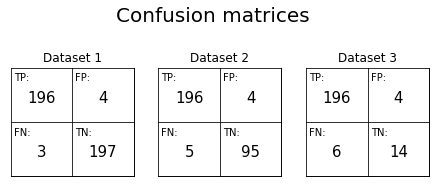

In [29]:
# decision trees
output = custom_classification(exp1, "dec_tree")
accuracy_df_dec_tree = output[0]
conf_mat_df_dec_tree = output[1]

print(accuracy_df_dec_tree)
custom_confusion_matrix(conf_mat_df_dec_tree)
plt.show()

         Dataset 1  Dataset 2  Dataset 3
log_reg       0.55      0.667      0.909


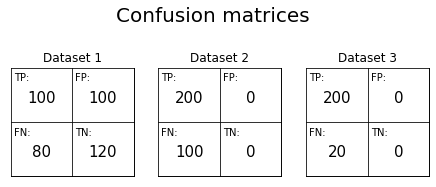

In [30]:
# logistic regression
output = custom_classification(exp1, "log_reg")
accuracy_df_log_reg = output[0]
conf_mat_df_log_reg = output[1]

print(accuracy_df_log_reg)
custom_confusion_matrix(conf_mat_df_log_reg)
plt.show()

In [31]:
# create dataframe comparing accuracy rates and plot it
accuracy_df_dec_tree = accuracy_df_dec_tree.rename_axis("model").reset_index()
accuracy_df_log_reg = accuracy_df_log_reg.rename_axis("model").reset_index()
accuracy_df_knn_distance = accuracy_df_knn_distance.rename_axis("model").reset_index()
accuracy_df_knn_uniform = accuracy_df_knn_uniform.rename_axis("model").reset_index()
accuracy_df_knn_distance = accuracy_df_knn_distance.assign(
    model = lambda x: "dist_" + x.model)
accuracy_df_knn_uniform = accuracy_df_knn_uniform.assign(
    model = lambda x: "unif_" + x.model )

accuracy_rates = pd.concat([accuracy_df_log_reg, accuracy_df_dec_tree,
                            accuracy_df_knn_distance, accuracy_df_knn_uniform])

         model  Dataset 1  Dataset 2  Dataset 3
0      log_reg      0.550      0.667      0.909
0     dec_tree      0.982      0.970      0.955
0   dist_k = 1      0.978      0.960      0.941
1   dist_k = 5      0.968      0.970      0.977
2  dist_k = 11      0.962      0.960      0.968
3  dist_k = 21      0.948      0.963      0.968
0   unif_k = 1      0.978      0.960      0.941
1   unif_k = 5      0.952      0.967      0.977
2  unif_k = 11      0.942      0.947      0.945
3  unif_k = 21      0.928      0.940      0.936


<Figure size 2160x2160 with 0 Axes>

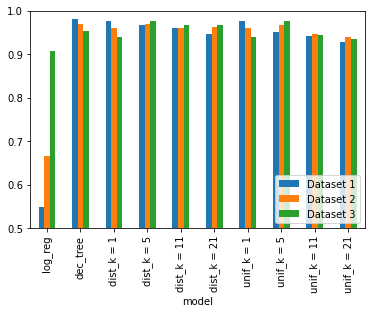

In [32]:
print(accuracy_rates)

fig = plt.figure(figsize = (30,30))
fig = accuracy_rates.plot.bar(x = "model")
fig.set_ylim([0.5,1])
fig.legend(loc = "lower right")
plt.show()

(e)
All classifiers show an accuracy above 93%, except logistic regression, which performs poorly on all three datasets. Logistic regression performs so poorly, as it tries to linearly separate the classes, which is not possible. This becomes apparent in the plot where false classifications are displayed (see below), and also in the confusion matrices for logistic regression, where the model just classifies all instances as -1 in dataset 2 and 3, which is the reason for the (misleading) higher accuracy for dataset 2 and 3.
Decision tree classifier shows impressive performance, having the highest accuracy rates for all three datasets. This makes sense, as the data can be easily separated with rules such as (if -1 < x < 1 and -1 < y < 1 then 1 else -1), which would require only depth of 2 in the decision tree and would perform with accuracy of 100%.



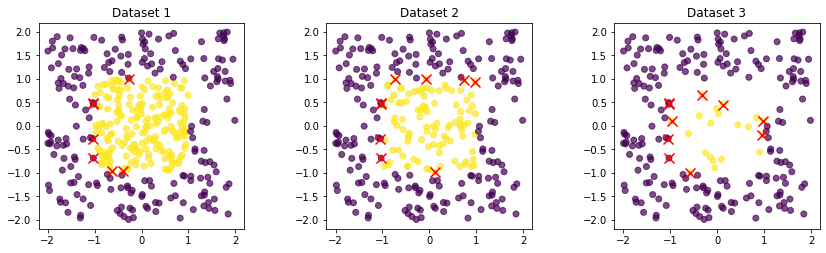

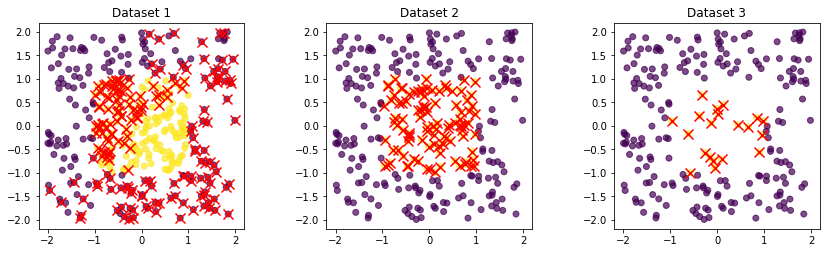

In [33]:
# visualize the errors of dec_tree and log_reg
def prediction_error_plot(data):
    fig = plt.figure(figsize= (14,14))
    fig.subplots_adjust(hspace=0.5, wspace=0.4)

    for i in range(0, len(exp1)):
        ax = fig.add_subplot(1, 3, i+1)
        ax.scatter(data[i]["x"], data[i]["y"],
                   c = data[i]["class"],
                   alpha = 0.7)
        ax.scatter(data[i][data[i]["correct_prediction"] == False]["x"],
                   data[i][data[i]["correct_prediction"] == False]["y"],
                   s = 100,
                   c = "red",
                   marker = "x")
        ax.set_title("Dataset " + str(i+1))
        ax.set(adjustable="box", aspect="equal")
    plt.show()


prediction_error_plot(custom_classification(exp1, "dec_tree")[2])
prediction_error_plot(custom_classification(exp1, "log_reg")[2])

## Assignment 1.2

        Dataset 1  Dataset 2
k = 1         1.0      0.569
k = 5         1.0      0.515
k = 11        1.0      0.510
k = 21        1.0      0.490


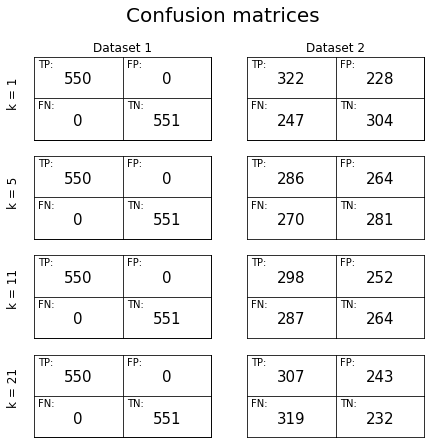

In [34]:
# Nearest neighbor
output = custom_knn(exp2, "uniform")
accuracy_df_knn = output[0]
conf_mat_df_knn = output[1]

print(accuracy_df_knn)
custom_confusion_matrix_knn(conf_mat_df_knn, 2, 4)
plt.show()

In [35]:
# Nearest neighbor with distance
output = custom_knn(exp2, "distance")
accuracy_df_knn = output[0]
conf_mat_df_knn = output[1]

print(accuracy_df_knn)

        Dataset 1  Dataset 2
k = 1         1.0      0.569
k = 5         1.0      0.568
k = 11        1.0      0.570
k = 21        1.0      0.563


          Dataset 1  Dataset 2
dec_tree      0.546      0.546


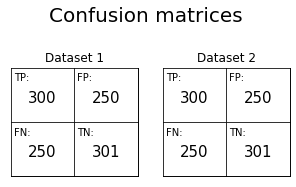

In [36]:
# Decision trees
output = custom_classification(exp2, "dec_tree")
accuracy_df_dec_tree = output[0]
conf_mat_df_dec_tree = output[1]

print(accuracy_df_dec_tree)
custom_confusion_matrix(conf_mat_df_dec_tree)
plt.show()

          Dataset 1  Dataset 2
gauss_NB      0.546      0.546


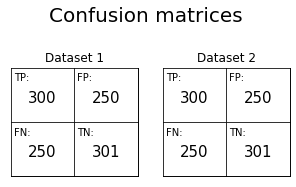

In [37]:
# Naive Bayes
output = custom_classification(exp2, "gauss_NB")
accuracy_df_NB = output[0]
conf_mat_df_NB = output[1]

print(accuracy_df_NB)
custom_confusion_matrix(conf_mat_df_NB)

plt.show()

         Dataset 1  Dataset 2
log_reg      0.546      0.515


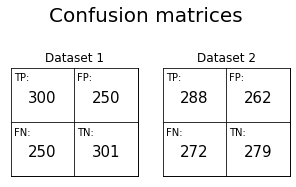

In [38]:
# Logistic Regression
output = custom_classification(exp2, "log_reg")
accuracy_df_log_reg = output[0]
conf_mat_df_log_reg = output[1]

print(accuracy_df_log_reg)
custom_confusion_matrix(conf_mat_df_log_reg)
plt.show()

C:\Users\sjasa\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sjasa\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


     Dataset 1  Dataset 2
SVM      0.546      0.525


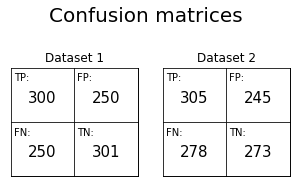

In [39]:
# SVMs
output = custom_classification(exp2, "SVM")
accuracy_df_SVM = output[0]
conf_mat_df_SVM = output[1]

print(accuracy_df_SVM)
custom_confusion_matrix(conf_mat_df_SVM)
plt.show()

(a):
For Dataset 1, logistic regression and Naive Bayes models show bad generalization performance with accuracy rates below 50%, while all other models (KNN, SVM, Decision Trees) have accuracy of 100%.
Naive Bayes performs poorly, because all conditional probabilities are 0.5 due to the distribution of the data, which would be equivalent to a random guess.
Logistic regression performs poorly as it, like in 1.1, tries to separate classes in a linear way, i.e. has a linear decision boundary.
SVM, which is also generally a linear classifier, produced good results by having several decision boundaries.
Decision trees perform well for the same reasons as in 1.1, i.e. being a non-linear classifier, and the data having clear "horizontal" and "vertical" boundaries between the classes.
KNN mainly performs well due, again, being non-linear, and due to the high density of the data and the clean boundaries between classes.

(b):
Test KNN and Naive Bayes by changing method: KNN (distance)



(c):
SVM shows the biggest drop in generalization performance, dropping from from 100% to 56.7%. KNN's performance drops almost the same, from 100% to 56.9% accuracy for $k=1$, and even worse accuracy scores for higher k. In both cases, the reason for the large drop in performance is the high number of variables, which make distances between datapoints very large. Thus, for KNN, it makes it more unlikely that neighbors with the "correct" class are selected. For SVM, it also increases the distances between datapoints,

(d):
Naive Bayes and Logistic regression show the smallest drop in performance, however only because they performed badly on Dataset 1 already.
Of the well-performing classifiers, decision tree classifier shows the smallest drop, with accuracy dropping from 100% top 73.8%. The reason for this drop is the random noise added, which increases the depth of the decision tree by a lot, and introduces many additional branches.


## Assignment 1.3

In [ ]:
# Naive Bayes
output = custom_classification(exp3, "gauss_NB")
accuracy_df_NB = output[0]
conf_mat_df_NB = output[1]

print(accuracy_df_NB)
custom_confusion_matrix(conf_mat_df_NB)

plt.show()

In [ ]:
# Nearest neighbor
output = custom_knn(exp3, "uniform")
accuracy_df_knn = output[0]
conf_mat_df_knn = output[1]

print(accuracy_df_knn)
custom_confusion_matrix_knn(conf_mat_df_knn, 4, 4)
plt.show()

In [ ]:
# Decision trees
output = custom_classification(exp3, "dec_tree")
accuracy_df_dec_tree = output[0]
conf_mat_df_dec_tree = output[1]

print(accuracy_df_dec_tree)
custom_confusion_matrix(conf_mat_df_dec_tree)
plt.show()

In [ ]:
# Logistic Regression
output = custom_classification(exp3, "log_reg")
accuracy_df_log_reg = output[0]
conf_mat_df_log_reg = output[1]

print(accuracy_df_log_reg)
custom_confusion_matrix(conf_mat_df_log_reg)
plt.show()

In [ ]:
# SVMs
output = custom_classification(exp3, "SVM")
accuracy_df_SVM = output[0]
conf_mat_df_SVM = output[1]

print(accuracy_df_SVM)
custom_confusion_matrix(conf_mat_df_SVM)
plt.show()

In [ ]:
# create dataframe comparing accuracy rates and plot it
accuracy_rates = pd.concat([accuracy_df_knn, accuracy_df_NB,
                            accuracy_df_dec_tree, accuracy_df_log_reg, accuracy_df_SVM])
print(accuracy_rates)

fig = plt.figure(figsize = (30,30))
fig = accuracy_rates.plot.bar()
fig.set_ylim([0.5,1])
fig.legend(loc = "lower right")
plt.show()

(a):
As shown in the barchart above, for Dataset 1, all classifiers have accuracy rates of > 95%, being highly accurate. For Datasets 2, 3 and 4, which have an increasing number of variables, accuracy rates steadily drop.
Overall, logistic regression and SVM show the best performance for the datasets of Experiment 3 due to their linear nature (however, they were not supposed to be run in Assignment 1.3).
Of the models that were supposed to be run in Assignment 1.3, gaussian Naive Bayes produced the worst accuracy for Dataset 1, however drops the least with increasing numbers of variables and thus performs best on datasets 2, 3, and 4, making NB the most robust one. The KNN model, a higher number for k produces better results, due to the "smoothing" effect on the border. Additionally, KNN in general also performs better than decision trees.
Decision trees perform the worst, as the original data is linearly separated, leading to "staircase" behaviour in the decision tree model. This staircase behavior is only made worse with an increasing number of variables.